Nama : Hafizh Al Muzakar\
NIM : 22/505360/PA/21760

# Langkah kerja :

- Mengambil data “ Marijuana Arrests in Toronto: Racial Disparities” dari https://www.kaggle.com/datasets/utkarshx27/arrests-for-marijuana-possession. Data berupa file csv, “Arrests.csv”.
- Program Python mengambil data dari file csv. Kolom yang diambil adalah kolom ke “Age”. Dilakukan sampling sebanyak 100 sample dari kolom tersebut . Kemudian , dilakukan bootstraping sebanyak 500.000 iterasi.
  

# Program Python

In [124]:
#library yang digunakan

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [125]:
# inisialisaasi data Marijuana Arrests in Toronto: Racial Disparities

df = pd.read_csv("C:/Users/LENOVO/OneDrive/Documents/OneDrive/Programing space/Data Set/arrests.csv" , index_col=0)
df.head()

,released,colour,year,age,sex,employed,citizen,checks
1,Yes,White,2002,21,Male,Yes,Yes,3
2,No,Black,1999,17,Male,Yes,Yes,3
3,Yes,White,2000,24,Male,Yes,Yes,3
4,No,Black,2000,46,Male,Yes,Yes,1
5,Yes,Black,1999,27,Female,Yes,Yes,1


In [126]:
# kolom yang ingin diamati
df_age = df['age'].to_numpy()

# menghitung rata-rata populasi
rata_rata_populasi = np.mean(df_age)

print("Rata-rata populasi: ", rata_rata_populasi)

# menghitung standar deviasi populasi
std_populasi = np.std(df_age)

print("Standar deviasi populasi: ", std_populasi)


Rata-rata populasi:  23.846536548029086
Standar deviasi populasi:  8.315337503313646


In [127]:
# mengambil seratus sample dari kolom age
df_age_sample = np.random.choice(df_age, 100)

# menghitung rata-rata sampel
rata_rata_sampel = np.mean(df_age_sample)
print("Rata-rata sampel: ", rata_rata_sampel)


# lakukan bootstraping 500_000 kali
bootstrap = np.random.choice(df_age_sample, size=(500_000, len(df_age_sample)), replace=True) 

# hitung rata-rata tiap bootstrap
mean_bootstrap = np.mean(bootstrap, axis=1)

# Pendekatan pertama : Menggunakan persentil ke-5 dan persentil ke-95 dari mean bootstrap.
interval_konfidensi = np.percentile(mean_bootstrap, [5, 95])
interval_konfidensi_bawah = interval_konfidensi[0]
interval_konfidensi_atas = interval_konfidensi[1]

print ('Interval konfidensi 90% : ', interval_konfidensi)

Rata-rata sampel:  23.28
Interval konfidensi 90% :  [22.04 24.57]


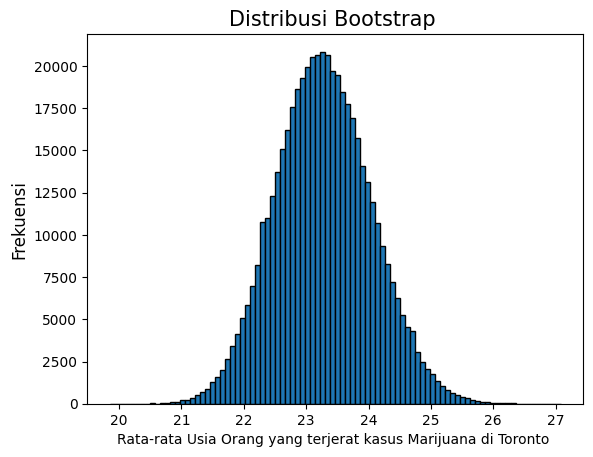

In [128]:
 # Plot histogram dari bootstrap
plt.hist(mean_bootstrap , bins= 90, edgecolor='black')

# label
plt.title('Distribusi Bootstrap ', fontsize=15)
plt.xlabel('Rata-rata Usia Orang yang terjerat kasus Marijuana di Toronto ', fontsize=10)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()


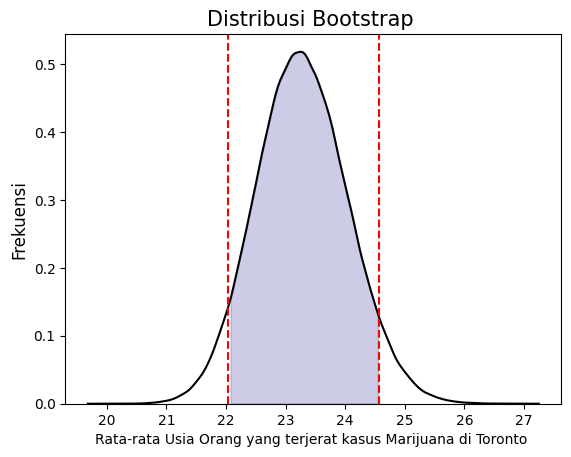

In [129]:
# plot distribusi rata rata usia orang yang terjerat kasus Mariajuana dari bootstrap
ax = sns.distplot(mean_bootstrap, bins=20, hist = False ,kde=True, color='black')


# garis vertikal untuk interval konfidensi
plt.axvline(interval_konfidensi_bawah, color='red', linestyle='--')
plt.axvline(interval_konfidensi_atas, color='red', linestyle='--')


# Fill area interval konfidensi
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
plt.fill_between(x1,y1,where = (x1>interval_konfidensi_bawah) & 
                               ( x1<interval_konfidensi_atas), 
                                color="darkblue", alpha=0.2)

# label
plt.title('Distribusi Bootstrap ', fontsize=15)
plt.xlabel('Rata-rata Usia Orang yang terjerat kasus Marijuana di Toronto ', fontsize=10)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

In [130]:
# Pendekatan kedua : Menggunakan distribusi normal Z. 
# Menggunakan mean dari sample dan standard deviasi dari sample.

A = rata_rata_sampel - 1.645 * (np.std(df_age_sample)/np.sqrt(len(df_age_sample)))
B = rata_rata_sampel + 1.645 * (np.std(df_age_sample)/np.sqrt(len(df_age_sample)))

if A > B:
    A, B = B, A

print(f'Interval Konfidensi = {A} < μ < {B}')

Interval Konfidensi = 22.014722288823517 < μ < 24.545277711176485


Booststrap Lower Bound 	: 22.04\
Booststrap Upper Bound 	: 24.57

Normal Sample Lower Bound :	22.014\
Normal Sample Upper Bound :	24.545


# Uji Hipotesis

Netizen di media sosial mengatakan bahwa rata rata umur orang yang di terjerat kasus Marijuana di Toronto adalah 22 tahun . Saya ingin membuktikan pernyataan tersebut menggunakan data sample


H0 ∶ 𝜇 = 22\
𝐻𝑎 ∶ 𝜇 ≠ 22\
𝑋̅ =  23.28\
𝜎 = 8.315\
𝑛 = 100\
𝛼 = 0,01

keterangan\
𝑋̅ = Rata-rata Sample\
𝜎 : Simpangan Baku Populasi\
𝑛 = Jumlah Sampel\
𝛼 = level of sicnificance



𝐶𝑟𝑖𝑡𝑖𝑐𝑎𝑙 𝑅𝑒𝑔𝑖𝑜𝑛 ∶ 𝑍 < 𝑍 (0.05) 𝑎𝑡𝑎𝑢 𝑍 > 𝑍 (0.95)\
𝐶𝑟𝑖𝑡𝑖𝑐𝑎𝑙 𝑅𝑒𝑔𝑖𝑜𝑛 ∶ 𝑍 < −1.65 𝑎𝑡𝑎𝑢 𝑍 > 1.65



𝑍 = ( 𝑋̅ - 𝜇 ) * (√n / 𝛼 )

𝑍 = ( 23.28 - 22 ) * (√100 / 8.315 )

Z = 1.539





Karena -1.65 < Z < 1.65, maka Z tidak berada di critical region. Sehingga H0 diterima.
Sehingga, dengan interval konfidensi 90%,  benar bahwa rerata umur orang yang di terjerat kasus Marijuana di Toronto adalah 22 tahun.





Kesimpulan :
- Distribusi mean sample tampak berdistribusi normal.
- Perhitungan upper dan lower bound interval konfidensi 90% memiliki hasil yang mirip 
dengan kedua pendekatan.
- Hipotesis null rerata umur orang yang di terjerat kasus Marijuana di Toronto adalah 22 tahun diterima.


